<img src="./doc_images/nyplogo.jpg">

# Lab 1 (solution): Car Model Classification with CNN
In this Lab we will try to build a Vehicle Classifier to classify three different models of the car. We will collect 3 groups of images namely  Honda Civic, Toyota Altis and Volkswagen Passat as our dataset. Then use the dataset to train the Renet50 CNN(Convolution Neural Network). Upon completed training the neural network we will be able to classify an unknown image to give a predicted output label of the model of the car.  


We will build the car model classifier based on the following steps

1.   Install the python modules   
2.   Import the libraries needed for the program
3.  Prepare the data
4.   Prepare the CNN model
5.  Train the model with the training set and evaluate its performance
6.   Use the trained model to classify input data



# 1. Install Python Modules
The libraries needed for the lab are preinstalled in the VM.

The following are examples of how the modules are installed.

Use the pip(python install program) to install the following modules
* !pip install tensorflow==1.13.1
* !pip install keras==2.1.6




# 2. Import the libraries needed for the program
We will begin by importing the libraries that we need, mainly Keras.  
Keras is based on minimal structure that provides a clean and easy way to create deep learning models based on TensorFlow or Theano.
Keras contains useful functions for image data preprocess and defining the convolution neural network.
Matplotlib is used for data visualization.



In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.resnet50 import ResNet50
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import keras
import tensorflow as tf

Using TensorFlow backend.
e:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
print(tf.__version__)

1.13.1


# 3. Prepare the data
Training Data: Collection of sample of data used to train the neural network.

Validation Data: Collection of sample of data used to provide an unbiased evaluation of neural netowork during the training.

Test Data: Collection of sample data used to evaluate the trained neural network.

### 3.1 Collect data for training and validation


```
In the path ./dataset/Lab1dataset/data/
create a train directory with following subdir
train 
   |- Honda
   |- Toyota
   |- Volkswagen 
copy 60 different jpg images for each of the car model into the above subdir(Honda, Toyota, Volkawagen)

```

```
In the path ./dataset/Lab1dataset/data/
create a validation directory with following subdir
validation 
   |- Honda
   |- Toyota
   |- Volkswagen 
copy 15 different jpg images for each of the car model into the above subdir(Honda, Toyota, Volkawagen)


```



```
In the path ./dataset/Lab1dataset/
creat a dir prediction_images
./dataset/lab1dataset/
    |- prediction_images
Copy some test images inside this directory. This images are used to test the trained model.

```



In [3]:
# Define train data paths, validation data path and test data path 
data_dir_path='./dataset/Lab1dataset/data/'
train_data_dir = data_dir_path+'train/'
validation_data_dir = data_dir_path+'validation/'
prediction_data_dir = './dataset/Lab1dataset/prediction_images/'

### Exercise
Let explore the images we had collected in the train dataset.

Try to display different images with the following code.

What do you notice about the images? 

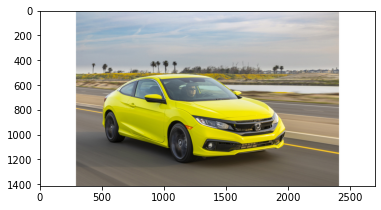

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(train_data_dir+"Honda/100.jpg")
imgplot = plt.imshow(img)


### 3.2 Prepare Data for training and validation

Data augmentation is a strategy that enables developer to significantly increase the diversity of data available for training models, without actually collecting new data. 

Data augmentation techniques such as resizing, rotation, and cropping are commonly used to train large neural networks.


<img src="./doc_images/Augmentation.png">


Kera provides us a function to do data augmentation. We can configure the arguments in the function to achieve the required image augmentation. We will do some of the configuration in the exercise.
 
Next we will construct the final train and validation dataset using the configured image augmentation, final image size(width and height) and batch size.



### Exercise
We will configure the image augmentation arguments for the train and validation data.

Here are some for the arguments.

rescale factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided. Most of the time we rescale based on the greyscale eg. 1./255

shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees) eg. 0.2 degrees

zoom_range: Float. zoom range for width and height. eg. 0.2

horizontal_flip: Boolean. Randomly flip inputs horizontally.eg. True

add the configuration value in the area #add code 

In [6]:
#Prepare Data for training and validation

def PrepareData(img_width,img_height,batch_size ):

    # This augments the data. This is usefull when working with a small sample size
    train_datagen = ImageDataGenerator(
        rescale= 1./255,
        shear_range= 0.2,
        zoom_range= 0.2,
        horizontal_flip= True)

    validation_datagen = ImageDataGenerator(rescale=1./255)

    print("train generator")
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    print("validation generator")
    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

    return train_generator,validation_generator

### 3.3 Get the total number of predicted classes/labels

Labels are the final output of prediction. You can also consider the output classes to be the labels. When we speak of labeled data, they mean groups of samples that have been tagged to one or more labels.

In our case, all the honda civic images are labeled as Honda. All the toyota altis images are labeled Toyota and all the volkswagen passat images are labeled Volkawagen.


From the train subdir we can get the number of classes


> The numbers of classes are categories of object we wanted to predict (3)

> The numbers of subdir in the training dir will be the classes/labels name (Honda, Toyota, Volkswagen)




### Exercise
Where can be get the information for the number of classes and the Label names?

In [7]:
# Gets the total no. of classes
classes = ImageDataGenerator().flow_from_directory(train_data_dir).class_indices
print(classes)
print(len(classes))
num_classes= len(classes)

Found 193 images belonging to 3 classes.
{'Honda': 0, 'Toyota': 1, 'Volkswagen': 2}
3


# 4. Prepare the CNN Model

### 4.1 CNN Convolution Netural Network

<img src="./doc_images/resnet50.png">

> Use the Resnet50 CNN model

> Each typical CNN layer comprise of Conv + Activation function + Maxpooling

> Each CNN layer can be added into the Keras Sequential 

> Define the parameters for each of the CNN layer

        *   Conv2D-> number of feature map, feature map size (width x height)
        *   Activation function -> relu , sigmoid 
        *   MaxPooling-> kernel size (width x height)

>Define the output layer

        *   Flatten-> 2D to 1D
        *   Dense layer->number of neutrons
        *   Activation Function->softmax(probability of each the classes)



### Execrise
We had resized all images in our dataset to be the same size as the input to the Resnet50 model.

What is the output of the Resnet50 model? 
What is the learning rate for model?

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error. It is range from 0 to 1. The bigger the number the bigger the response step. The learning rate is one of the important perparameter when configuring your neural network.

In [8]:
def compileModel(img_width, img_height,learning_rate=1e-4):
    print("compiling model")

    # Insureing that the images are in the correct format.
    if K.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 3)
    
    img_color=3

    conv_base = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(img_width, img_height, img_color))

    model = models.Sequential()
    model.add(conv_base)
    #Add dense and classification layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # print(model.summary())
    # print(conv_base.summary())
    model.compile(loss='categorical_crossentropy',optimizer= optimizers.adam(lr=learning_rate),metrics=['accuracy'])
    for layer in conv_base.layers:
      layer.trainable = False
    for layer in conv_base.layers[-4:]:
      layer.trainable = True
    return model


Some checkpoint to save the best trained model during the training. 

In [9]:
best_model = keras.callbacks.ModelCheckpoint(data_dir_path+'custom_w_supervision_try2_best' + '.h5', monitor='val_acc',save_best_only=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.25, patience=5,min_lr=0.000005)


# 5. Train the model with the training set and evaluate it performance

### 5.1 Train and validate the model


<img src="./doc_images/training.png">

With the preprocessed training and validation dataset. We can input them into the our defined model for training.
We will then set the parameters of the training.

Set the number of epoch to  indicates the number of passes of the entire training dataset the model has to complete.

When we have a huge data set it not possible to load the entire data to run one epoch of training. Setting Step per epoch allow huge data to divide into batches to complete entire training.



In [11]:
def trainModel(train_data, validation_data,model):

    print("starting training.... ")
    hist = model.fit_generator(
        (train_data),
        steps_per_epoch=nb_train_samples // batch_size, # The accumulated amount of steps
        epochs=epochs,
        validation_data=validation_data,
        nb_val_samples=nb_validation_samples,
        callbacks=[best_model, reduce_lr]
    )

    plotVal_plotLoss(hist)
    model.save_weights(data_dir_path+'custom_w_supervision_try2.h5') # Saving the compile weights

This function is to plot the accuracy and loss result of the model during the training.
 
Loss value implies how poorly or well a model behaves after each iteration of training.

Accuracy is a metric that can be applied to classification tasks only. It describes just what percentage of your train/test data are classified correctly.

In [12]:
# This function generates graphs of the loss and the accuracy of the model
def plotVal_plotLoss (model) :

    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()

    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()


### Exercise
```
Now we are ready to start the training

Define the image size for the dataset and batch size for the PrepareData function
img_width, img_height = 197, 197
batch_size = # The batch size represents the total amount of images that are included in each iteration.


Define the image size and the learning rate for compileModel function
model=compileModel(img_width, img_height,learning_rate=1e-4)

Define the total amount of samples in both the training and validation set
nb_train_samples = #add code
nb_validation_samples =#add code
epochs = #add code
trainModel(train_data, validation_data, model)

You can varies the batch_size, epochs to understand the impact on the model accuracy and loss values


```

train generator
Found 193 images belonging to 3 classes.
validation generator
Found 46 images belonging to 3 classes.
compiling model
starting training.... 
Instructions for updating:
Use tf.cast instead.


e:\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
e:\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=6, epochs=1, validation_data=<keras.pre..., callbacks=[<keras.ca..., validation_steps=45)`
  # Remove the CWD from sys.path while we load stuff.
e:\python37\lib\site-packages\keras\engine\training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.train

Epoch 1/1
6/6 [==============================] - 248s 41s/step - loss: 1.1310 - acc: 0.4083 - val_loss: 0.9806 - val_acc: 0.5451


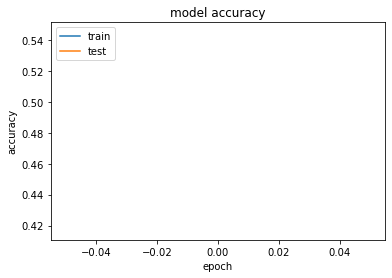

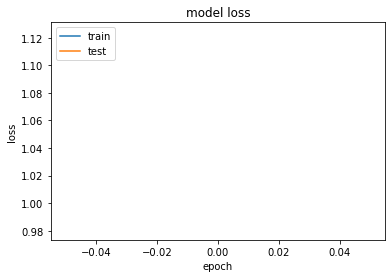

In [13]:
# dimensions of our images.
img_width, img_height = 197,197

# The batch size represents the total amount of pictures that are included in each iteration.
batch_size = 30

#Prepare data
train_data, validation_data = PrepareData(img_width,img_height,batch_size)

#Load Model
model=model=compileModel(img_width, img_height,learning_rate=1e-4)

# Defining the total amount of samples in both the training and validation set
nb_train_samples = 180
nb_validation_samples = 45
epochs = 1

#Start the training model
trainModel(train_data, validation_data, model)



# 6. Use the trained model to classify input data



### 6.1 Setup a predict image function

In the prediction function, we will read in an image and resize it to be the same size(width and height) as the trained model input. Then pass it into the model for prediction, the predicted result will be represented with the label name. In our case will the car model names(Honda, Toyota, Volkswagen)

In [14]:
# This function c
def predictImg(path, model):
    imagep = image.load_img(path, target_size=(197, 197))
    x = image.img_to_array(imagep)
    x = x / 255  # Insures that images are normalized, so it can be compared test on a model that also used normalized training and validation images

    x = np.expand_dims(x, axis=0) # flattens the image
    prediction = model.predict(x) # Extract the prediction made by the model
    print(path)
    print(prediction)
    findLabel(prediction, 0.2, path)


In [15]:
def findLabel(test, threshold, path):
    if (max(test[0]) < threshold):
        print("no class could be defined for " + path + " with threshold 0.85")
    else:
        m = max(test[0])
        index = [i for i, j in enumerate(list(test[0])) if j == m]
        labeler(index[0], path)


In [16]:
def labeler(inp, pathname):
    label = list(classes.keys())[inp]
    print("The image '" + pathname + "' belongs to class: " + label) # Prints the prediction
    return 0

### Exercise

Now we are ready to use the trained model to predict the image.

Load our Resnet50 CNN model with the trained values. The trained values are stored in the .h5 file.

Pass the image and the trained model to the prediction function.

Try with different image from different car model and check the predicted result again the ground truth.


In [17]:
img_width, img_height = 197, 197
np.set_printoptions(suppress=True, precision=3)

img_width, img_height = 197, 197
np.set_printoptions(suppress=True, precision=3)

model = compileModel(img_width, img_height)

model.load_weights(data_dir_path+'custom_w_supervision_try2_best.h5')

predictImg(prediction_data_dir + '/toyota1.jpg', model) # 


compiling model
./dataset/Lab1dataset/prediction_images//toyota1.jpg
[[0.196 0.374 0.43 ]]
The image './dataset/Lab1dataset/prediction_images//toyota1.jpg' belongs to class: Volkswagen
